# Customer Churn Prediction

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('bank.csv',sep=';')

In [6]:
df.shape

(4521, 17)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
##check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [11]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Dropping Irrelevant Features

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
df = df.drop(['default', 'contact', 'day','month'],axis=1)

In [15]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
df.shape

(4521, 13)

In [17]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,no,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,no,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,226,1,-1,0,unknown,no


In [18]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


# Encoding Categorical Data

In [19]:
df = pd.get_dummies(df,drop_first = True)

In [20]:
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# Some insights about the target variable

df['y_yes'].value_counts()

<AxesSubplot:xlabel='y_yes', ylabel='count'>

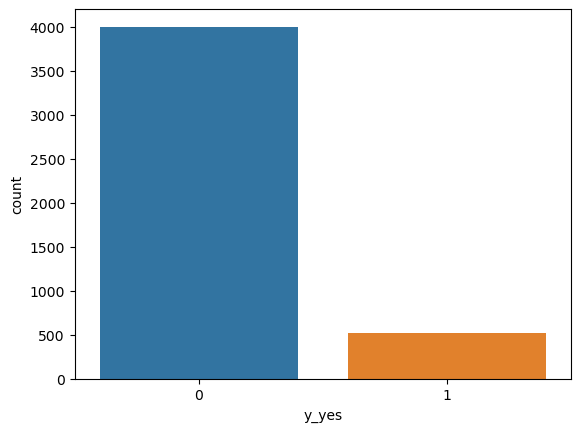

In [25]:
sns.countplot(df['y_yes'])

# Handling Imbalanced Data with SMOTE

In [27]:
X = df.drop('y_yes',axis=1)
y = df['y_yes]

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [32]:
y_res.value_counts()

0    4000
1    4000
Name: y_yes, dtype: int64

<AxesSubplot:xlabel='y_yes', ylabel='count'>

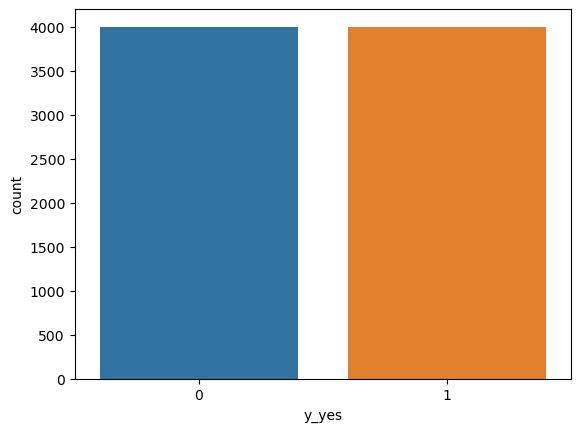

In [33]:
sns.countplot(y_res)

# Splitting The Dataset into Training Set and Test Set

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

#  Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
X_train

array([[-1.25188904, -0.05203712, -0.3335927 , ..., -0.17369295,
        -0.20601527,  0.6485358 ],
       [ 0.32277254,  0.27096335, -0.7829774 , ..., -0.17369295,
        -0.20601527,  0.6485358 ],
       [ 1.24904407, -0.45292929, -0.60921532, ..., -0.17369295,
        -0.20601527,  0.6485358 ],
       ...,
       [ 0.04489109, -0.53796703,  0.65505363, ..., -0.17369295,
        -0.20601527,  0.6485358 ],
       [-0.97400759, -0.39504647, -0.12687574, ..., -0.17369295,
        -0.20601527,  0.6485358 ],
       [ 0.87853546,  0.92875523,  0.03490275, ..., -0.17369295,
        -0.20601527,  0.6485358 ]])

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log = LogisticRegression()

In [44]:
log.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred1 = log.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test,y_pred1)

0.9079166666666667

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [49]:
precision_score(y_test, y_pred1)

0.9251700680272109

In [50]:
recall_score(y_test, y_pred1)

0.8910728910728911

In [51]:
f1_score(y_test,y_pred1)

0.9078014184397164

# SVC

In [52]:
from sklearn import svm

In [53]:
svm = svm.SVC()

In [54]:
svm.fit(X_train,y_train)

SVC()

In [55]:
y_pred2=svm.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred2)

0.90875

In [57]:
precision_score(y_test, y_pred2)

0.9341421143847487

In [58]:
recall_score(y_test, y_pred2)

0.8828828828828829

In [59]:
f1_score(y_test,y_pred2)

0.9077894736842106

# KNeighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
y_pred3=knn.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred3)

0.8916666666666667

In [65]:
precision_score(y_test, y_pred3)

0.9054852320675105

In [66]:
recall_score(y_test, y_pred3)

0.8787878787878788

In [67]:
f1_score(y_test,y_pred3)

0.8919368246051538

# Desicion Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()

In [70]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred4=dt.predict(X_test)

In [72]:
accuracy_score(y_test, y_pred4)

0.8895833333333333

In [73]:
precision_score(y_test, y_pred4)

0.8905228758169934

In [74]:
recall_score(y_test, y_pred4)

0.8927108927108927

In [75]:
f1_score(y_test,y_pred4)

0.8916155419222903

# Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier()

In [78]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred5=rf.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred5)

0.9245833333333333

In [81]:
precision_score(y_test, y_pred5)

0.9384485666104553

In [82]:
recall_score(y_test, y_pred5)

0.9115479115479116

In [83]:
f1_score(y_test,y_pred5)

0.924802658911508

# Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbc = GradientBoostingClassifier()

In [86]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [87]:
y_pred6=gbc.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred6)

0.9108333333333334

In [89]:
precision_score(y_test,y_pred6)

0.9157720891824938

In [90]:
recall_score(y_test,y_pred6)

0.9082719082719083

In [91]:
f1_score(y_test,y_pred6)

0.9120065789473684

# XGBoost

In [92]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [94]:
y_pred7=model_xgb.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred7)

0.915

In [96]:
precision_score(y_test,y_pred7)

0.924812030075188

In [97]:
recall_score(y_test,y_pred6)

0.9082719082719083

In [98]:
f1_score(y_test,y_pred6)

0.9120065789473684

# Accuracy Summary

In [99]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred1),
           accuracy_score(y_test,y_pred2),
           accuracy_score(y_test,y_pred3),
           accuracy_score(y_test,y_pred4),
           accuracy_score(y_test,y_pred5),
           accuracy_score(y_test,y_pred6),
           accuracy_score(y_test,y_pred7)
          ]
})

In [100]:
performance_summary

,Model,ACC
0,LR,0.907917
1,SVC,0.908750
2,KNN,0.891667
3,DT,0.889583
4,RF,0.924583
5,GBC,0.910833
6,XGB,0.915000


<AxesSubplot:xlabel='Model', ylabel='ACC'>

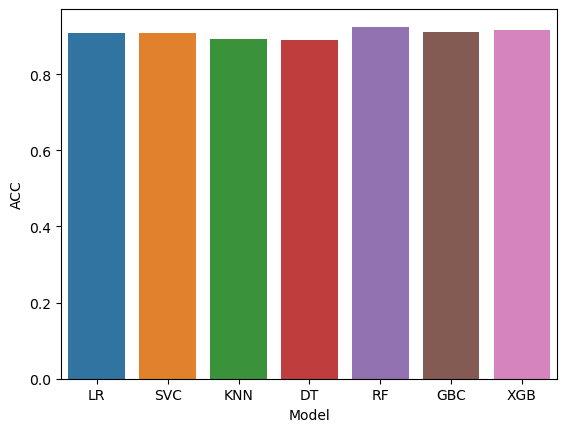

In [101]:
sns.barplot(performance_summary['Model'],performance_summary['ACC'])

In [102]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'PRECISION':[precision_score(y_test,y_pred1),
           precision_score(y_test,y_pred2),
           precision_score(y_test,y_pred3),
           precision_score(y_test,y_pred4),
           precision_score(y_test,y_pred5),
           precision_score(y_test,y_pred6),
            precision_score(y_test,y_pred6)
          ]
})

In [103]:
performance_summary

,Model,PRECISION
0,LR,0.925170
1,SVC,0.934142
2,KNN,0.905485
3,DT,0.890523
4,RF,0.938449
5,GBC,0.915772
6,XGB,0.915772


<AxesSubplot:xlabel='Model', ylabel='PRECISION'>

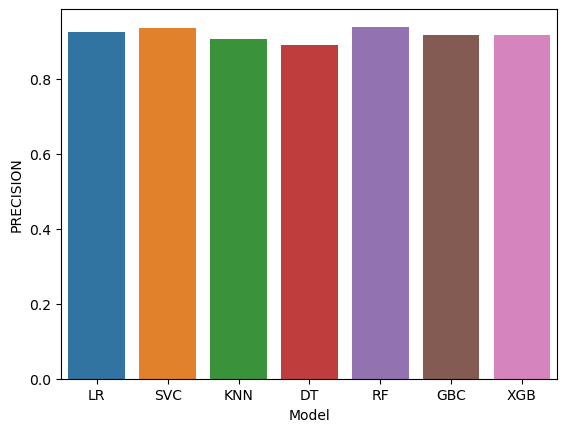

In [104]:
sns.barplot(performance_summary['Model'],performance_summary['PRECISION'])

# Saving the best model, XGBoost

In [105]:
X_train = sc.fit_transform(X_train)

In [106]:
model_xgb.fit(X_res,y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [107]:
import joblib

In [108]:
joblib.dump(model_xgb, 'churn_predict_model')

['churn_predict_model']

In [109]:
model = joblib.load('churn_predict_model')